## Student Transportation Choice

# Student Transportation Choice Study

Article Name: *Ride to the Hills, Ride to Your School: Physical Effort and Mode Choice*

[*Source: Müller et al. (2008), Dresden, Germany*](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3860104)

## Study Overview
This research analyzed travel-to-school mode choices among over 4,000 young students in Dresden. Each student was observed twice: once in summer and once in winter term. The dataset includes detailed information about school locations, student residences, travel distances, and various student characteristics.

## Variables

### Temporal
- **Season**: Binary indicator
  - 1 = Winter term/bad weather
  - 0 = Otherwise

### Transportation
- **Car Availability**: Binary indicator
  - 1 = Car always available (as driver or passenger)
  - 0 = Limited/no availability (includes partial weekly access)
- **Mode**: Categorical indicator
  - 1 = Walking
  - 2 = Cycling
  - 3 = Public Transport
  - 4 = Car/MotorCycle
- **Distance**: Travel distance to school (in kilometers)

### Student Demographics
- **Age**: Student's age in years
- **Female**: Binary indicator
  - 1 = Female
  - 0 = Male
- **Grade**: Student's grade level (5th through 12th)

### Physical Factors
- **Leistung**: Performance/effort measure
  - Measured in kcal
  - Represents energy input for transportation

*Note: CB_Location variable was excluded due to undefined meaning in the source material.*
 

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/student-mode-choice-data/StudentModeChoice.txt', sep='\t')
df.drop(["CB_location"],axis=1, inplace=True)
df.head()

,ID,Choice,Distance,School_location,Grade,Age,Gender,CarAvail,Season,Leistung
0,1,2,6.03139,0,9,15,0,0,0,152.98
1,2,2,3.48652,0,9,15,1,0,0,64.67
2,3,4,5.33100,0,9,14,1,1,0,147.19
3,4,3,3.75005,0,9,15,0,0,0,1287.90
4,5,2,2.04100,0,9,15,1,0,0,35.36


In [2]:
df.isnull().sum() #no missingness

ID                 0
Choice             0
Distance           0
School_location    0
Grade              0
Age                0
Gender             0
CarAvail           0
Season             0
Leistung           0
dtype: int64

In [3]:
recode_choices = {1:"Walking",
                 2: "Cycling",
                 3: "Public Transport",
                 4: "Car/MotorCycle"}

recode_season = {1: "Winter Term/Bad Weather", 0:"Otherwise"}
# recode the variable
df["choice_names"] = df["Choice"].map(recode_choices)
df["season_names"] = df["Season"].map(recode_season)
df.choice_names.value_counts()

choice_names
Public Transport    4675
Walking             1858
Cycling             1484
Car/MotorCycle       539
Name: count, dtype: int64

In [4]:
df.season_names.value_counts()

season_names
Otherwise                  4278
Winter Term/Bad Weather    4278
Name: count, dtype: int64

## Exploratory Data Analysis

In [5]:
total_students = df.groupby(['choice_names','season_names'])['ID'].count().reset_index()

In [6]:
total_students

,choice_names,season_names,ID
0,Car/MotorCycle,Otherwise,192
1,Car/MotorCycle,Winter Term/Bad Weather,347
2,Cycling,Otherwise,1133
3,Cycling,Winter Term/Bad Weather,351
4,Public Transport,Otherwise,2107
5,Public Transport,Winter Term/Bad Weather,2568
6,Walking,Otherwise,846
7,Walking,Winter Term/Bad Weather,1012


<Axes: xlabel='choice_names', ylabel='ID'>

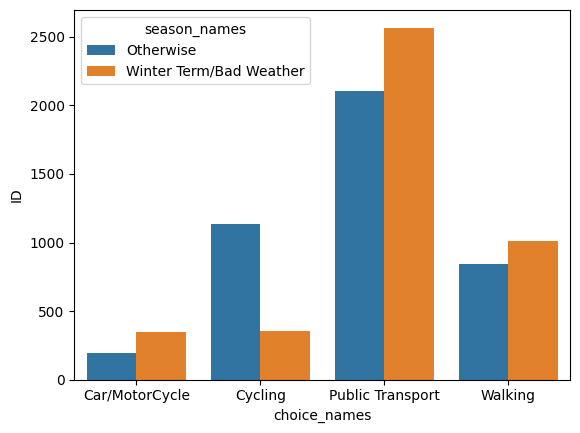

In [7]:
import seaborn as sns

sns.barplot(data=total_students, x='choice_names', y='ID',hue='season_names') 

<Axes: xlabel='choice_names', ylabel='Leistung'>

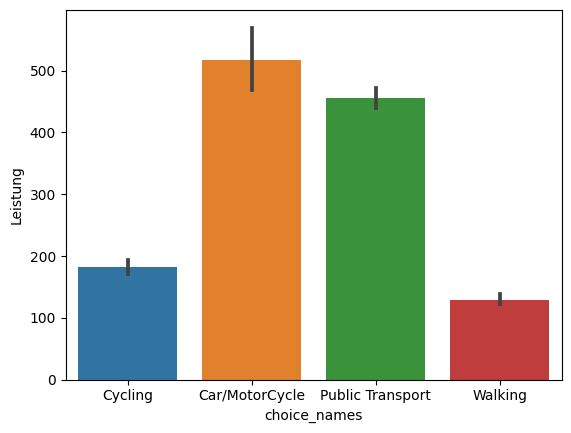

In [8]:
#this is the opposite of what I expected
sns.barplot(data = df, x='choice_names', y='Leistung')